# <center>Medical insurance price predictionn</center>

### Aim :
- To Implement a Linear Regression model and predict medical insurance prices based on user input
- It is an **supervised Learning** problem statement.

### <center>Dataset Attributes</center>
    
- **bmi** : BMI of the customer
- **Sex** : Gender of the customer
- **Age** : Age of the customer
- **children** : Number of children a customer has
- **charges** : Insurance charges of each customer
- **smoker** : Whether the customer is a smoker or not
- **region** : Region which the customer belongs

### Notebook Contents :
- Dataset Information
- Exploratory Data Analysis (EDA)
- Summary of EDA
- Feature Engineering
- Modeling
- Conclusion

# <center>Dataset Information</center>

### Import the Necessary Libraries :

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Info :

In [4]:
df.shape


(2772, 7)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

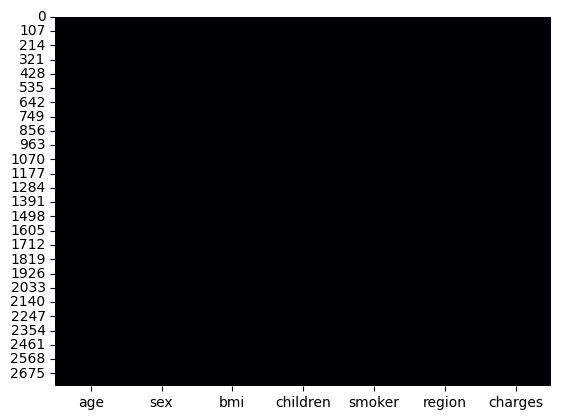

In [7]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);


- **No null values** present in the data!

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2767     True
2768     True
2769     True
2770     True
2771     True
Length: 2772, dtype: bool

- **Duplicate values** are present in the data!

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.describe()


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## Data Description

The dataset contains information about individuals, with columns for age, BMI (Body Mass Index), number of children, and insurance charges.

### 1. Age
   - The ages in the dataset range from **18** to **64** years.
   - The average age is approximately **39** years.

### 2. BMI (Body Mass Index)
   - The BMI values range from **15.96** to **53.13**.
   - The average BMI is around **30.66**.
### 3.Children:
   -The number of children per individual ranges from **0 to 5**.
### 4. Charges
   - Insurance charges vary widely, with the minimum being **1121.87** and the maximum reaching **63770.43**.
   - The average insurance charge is approximately **13279.12**.

Additionally, summary statistics (count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum) provide a comprehensive overview of the distribution of values in each column. These statistics can help understand the central tendency, spread, and overall shape of the data in each category.


# <center>Exploratory Data Analysis</center>

### Dividing features into Numerical and Categorical :

In [11]:
col = list(df.columns)
categorical_features = []
numerical_features = []

for i in col:
    if df[i].dtype == 'object':  # Check if the data type is object (categorical)
        categorical_features.append(i)
    else:
        numerical_features.append(i)

print('Categorical Features:', *categorical_features)
print('Numerical Features:', *numerical_features)


Categorical Features: sex smoker region
Numerical Features: age bmi children charges


## Feature Classification

The provided code classifies features into categorical and numerical types based on their data types. If a feature has the data type 'object,' it is considered categorical; otherwise, it is classified as numerical.


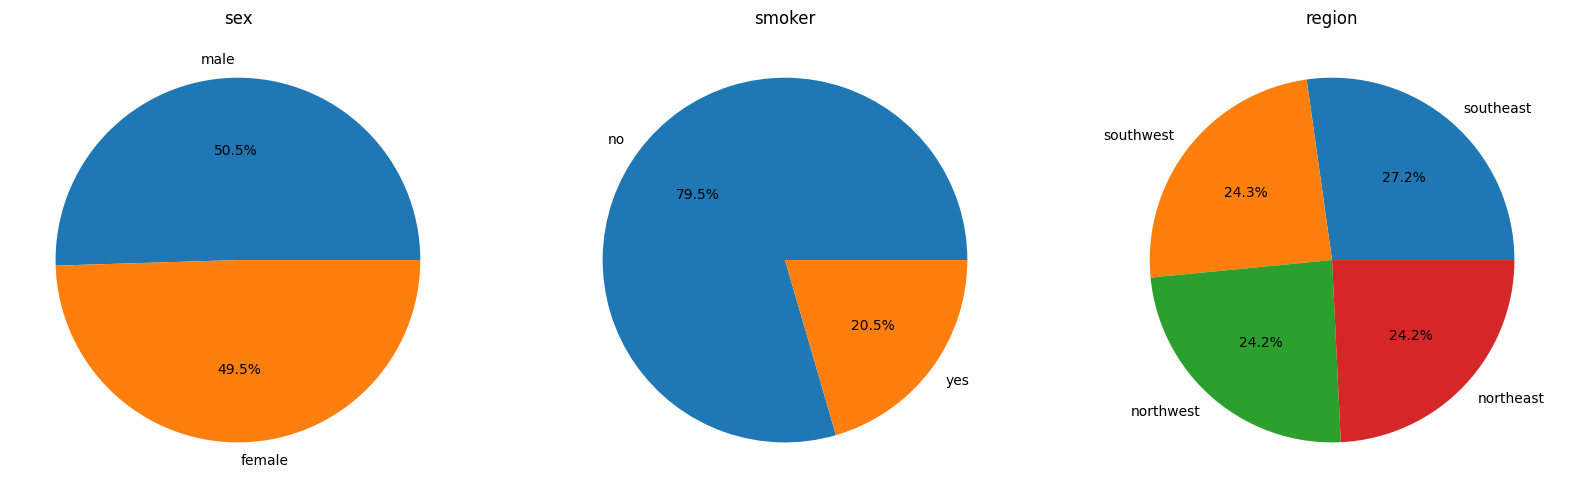

In [12]:
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    values = df[col].value_counts()
    plt.pie(values, labels=values.index, autopct='%1.1f%%')

    plt.title(col)  # Add the feature name as the title

plt.show()


## Categorical Feature Distribution Visualization

This code generates a set of three pie charts to visually represent the distribution of unique values in three categorical features: **'sex'**, **'smoker'**, and **'region'**. Each pie chart illustrates the proportion of occurrences for each unique category within the respective feature. The figure is organized into three subplots, one for each categorical feature, providing a quick and insightful overview of the distribution patterns in the dataset.



In [13]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

**Transformed categorical columns:**

- **Sex:** Encoded as 0 for male and 1 for female.

- **Smoker:** Encoded as 0 for yes and 1 for no.

- **Region:** Encoded with southeast as 0, southwest as 1, northeast as 2, and northwest as 3.

This encoding enhances machine learning compatibility, providing numerical representations for categorical variables.


In [ ]:


# Plotting for Categorical Features
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_features), figsize=(15, 5))
for i, col in enumerate(categorical_features):
    sns.countplot(x=df[col], ax=axes[i])
    title = 'Distribution: ' + col
    axes[i].set_title(title)

# Plotting for Numerical Features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, col in enumerate(numerical_features):
    sns.histplot(df[col], ax=axes[i//2, i%2], kde=True)
    title = 'Distribution: ' + col
    axes[i//2, i%2].set_title(title)

plt.show()


# <center>Summary of EDA</center>

- **bmi:** The categorical feature, data displays a **normally distributed**.

- **Charges:** The distribution is **left-skewed**.

- **Children:** The number of children per individual ranges from **0 to 5**, with **0** being the most common (573 occurrences). There are a total of **6** unique values.

- **Smoker:** There are two unique values for the smoking status: **0** and **1**. The majority (**1063** instances) indicate individuals who are smokers, while **274** indicate non-smokers.

- **Region:** The 'region' column shows nearly equal distribution among its four unique values. Region 0 has 364 occurrences, Region 1 has 325 occurrences, while both Regions 2 and 3 each have 324 occurrences.
  
- **Sex:** The 'sex' column shows two unique values. There are 675 occurrences of '0' (male) and 662 occurrences of '1' (female). 
   
- **Age:** The distribution spans from 18 to 64 years, with an average age of approximately 39 years which suggest a relatively balanced representation of both genders in the dataset.

# <center>Feature Engineering</center>

### Correlation Matrix :

In [ ]:
ut = np.triu(df.corr())
lt = np.tril(df.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(df.corr(),cmap = 'inferno',annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(df.corr(),cmap = 'inferno',annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# If it's not already defined, you can create it using your data

# Generate correlation matrix
correlation_table = df.corr()

# Print or display the correlation table
print(correlation_table)


- Both the matrix displayed are same! It is only done for visualization purpose. This trick can be used when the dataset has too many features to look into!
- **Smoker and Charges:** 
Being a smoker shows a **strong negative correlation** of approximately **-0.79** with charges. This suggests that smokers tend to have significantly higher insurance charges compared to non-smokers
- This information is gained from the **EDA** section the correlation matrix values further back the evidence. 
- We will now move to the modeling section by creating combinations of these features and finding different ways in which the mall customers can be segmented!.


# <center>Modeling</center>

- **Supervised Learning**: It is a problem where the target variable is known and used for training the model. **Supervised Learning** is commonly applied in scenarios where there is a clear understanding of the relationship between input features and the target variable. In the context of healthcare, for example, predicting the likelihood of a patient having a specific disease based on known symptoms falls under supervised learning.

- **Linear Regression**, a fundamental supervised learning algorithm, aims to model the relationship between a dependent variable and one or more independent variables. It is particularly useful for predicting continuous outcomes. In healthcare, Linear Regression could be employed to predict patient blood pressure based on various health indicators, providing insights into potential risks.

- **Linear Regression is especially powerful when visualizing relationships between variables becomes impractical due to large datasets or numerous features. Instead of relying solely on visualization, Linear Regression uses a mathematical approach to identify patterns and relationships within the data.**

- However, it's crucial to note that Linear Regression assumes a linear relationship between the independent and dependent variables. It might not be suitable for capturing complex, non-linear patterns in the data.

- **Key Features**:
  - **Coefficients**: Linear Regression assigns coefficients to each independent variable, indicating their impact on the dependent variable.
  - **Intercept**: The intercept represents the expected value of the dependent variable when all independent variables are zero.

- **Performance Evaluation**:
  - Linear Regression's performance is often assessed using metrics like Mean Squared Error (MSE) or R-squared, which quantify the accuracy of predictions.

- **Example**:
  - In a real-world scenario, Linear Regression can be applied to predict housing prices based on features like square footage, number of bedrooms, and location. The model would learn the relationship between these features and the house prices.

**We will now create models by training them on the combination of the features selected from the above tests and visualize as well.**


In [ ]:

X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [ ]:
print(X)

In [ ]:
print(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

In [ ]:
# loading the Linear Regression model
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

In [ ]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

In [ ]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

In [ ]:
regressor.coef_

In [ ]:
regressor.intercept_

In [ ]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

# <center>Conclusion</center>
- Linear regression model is implemented with intercept as **11594.234**.
- R squared value is **0.715**.
- Medical insurance price is predicted based on the input provided by the user